# Machine Learning Fundamentals

**Dataset:** Nutrition Facts for McDonald’s Menu data

Please download *menu.csv* from the following link:
https://www.kaggle.com/mcdonalds/nutrition-facts

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 

/Users/mona/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 0. Load Data

In [2]:
# [INSERT CODE TO LOAD DATA]
# Load the dataset
menu = pd.read_csv('menu.csv')

# Print the first few rows and datatypes
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


# 1. Data Exploration (20 points)

### (a) Plot the histogram of the Calories. Comment on the datatype of the features.


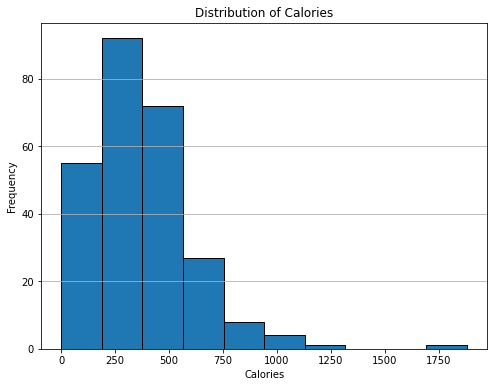

In [3]:
# [INSERT CODE HERE]
plt.figure(figsize=(8, 6))
plt.hist(menu['Calories'], bins=10, edgecolor='black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()



The histogram shows a right-skewed distribution with a single peak. Most of the data points are concentrated between 0 and 550 Cal, indicating the central tendency around these values. 

### The data type we have in our dataset:
<b>Continuous Data:</b> Continuous data are numerical and can take almost any value within a range such as Calories, Total Fat, Carbohydrates, Protein, Price, etc

<b>Nominal Data:</b> Used for grouping or as categorical variables with no intrinsic ordering such as Item, Category


### (b) Plot the correlation heatmap between features and Calories

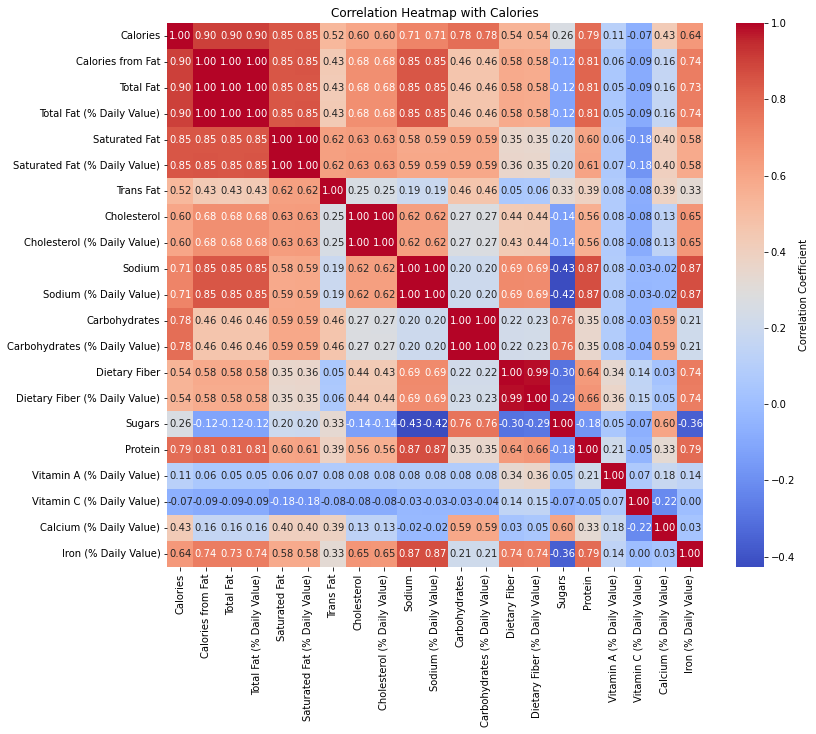

In [4]:
# Compute the correlation matrix
corr_matrix = menu.corr()

# Plot the heatmap for the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap with Calories')
plt.show()

The heatmap shows that Calories from Fat, Total Fat, and Total Fat (% Daily Value) exhibit the strongest positive correlation with overall Calories, with a correlation coefficient of 0.9. In contrast, Vitamin C (% Daily Value) has the largest negative correlation with Calories with a correlation coefficient of -0.07.

### (c) List the features which have the second and third largest positive correlation with Calories.

Note: if you encounter multiple features actually mean the same thing, only list the feature with the largest
correlation. For instance, if you see Sodium and Sodium (%Daily Value) and the former has larger
correlation with Calories, list Sodium only.

In [5]:
# Get the correlation of all features with Calories
calories_corr = corr_matrix['Calories'].drop('Calories')

# Sort the correlations from largest to smallest
sorted_corr = calories_corr.sort_values(ascending=False)


# List the second and third largest unique correlations
second_largest = sorted_corr.index[1]  # second
third_largest = sorted_corr.index[3]   # third

# Display the features
print(f"Second largest positive correlation with Calories: {second_largest}")
print(f"Third largest positive correlation with Calories: {third_largest}")

Second largest positive correlation with Calories: Total Fat
Third largest positive correlation with Calories: Saturated Fat (% Daily Value)


### (d) Report all features which have negative correlation with Calories.

Does your result meet your expectation?

In [6]:
corr_with_calories = menu.corr()['Calories']

#Features with negative correlation with Calories
negative_corr_features = corr_with_calories[corr_with_calories < 0]

print("Features with negative correlation with Calories:")
print(negative_corr_features)

Features with negative correlation with Calories:
Vitamin C (% Daily Value)   -0.068747
Name: Calories, dtype: float64


The result aligned with my expectations. The heatmap shows that Vitamin C (% Daily Value) is the only feature with a negative correlation with calories.

# 2. Plotting (20 points)

### (a) Plot the scatter plot for ‘features vs. Calories’ for all features found in 1(c) and 1(d).

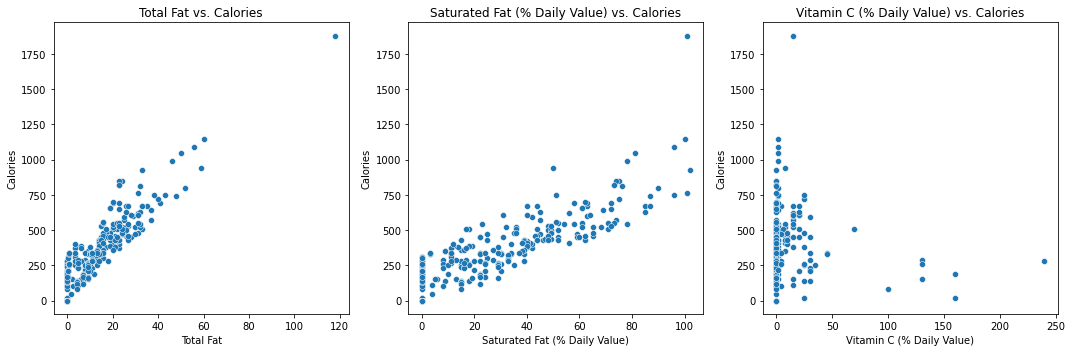

In [7]:
# [INSERT CODE HERE]
df = pd.DataFrame(menu)

#Scatter Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Total Fat', y='Calories', data=df)
plt.title('Total Fat vs. Calories')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Saturated Fat (% Daily Value)', y='Calories', data=df)
plt.title('Saturated Fat (% Daily Value) vs. Calories')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Vitamin C (% Daily Value)', y='Calories', data=df)
plt.title('Vitamin C (% Daily Value) vs. Calories')

plt.tight_layout()
plt.show()



The scatter plot illustrates the positive correlation between calories and both Total Fat and Saturated Fat. It also indicates a slight negative correlation between calories and Vitamin C (% Daily Value), although the data for Vitamin C is sparse and contains outliers.

### (b) Plot the box plot for all features found in 1(c) and 1(d) correspondingly.

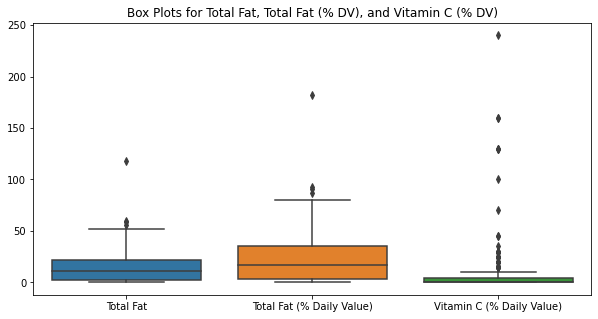

In [8]:
# [INSERT CODE HERE]
# (b) Box Plots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Total Fat', 'Total Fat (% Daily Value)', 'Vitamin C (% Daily Value)']])
plt.title('Box Plots for Total Fat, Total Fat (% DV), and Vitamin C (% DV)')
plt.show()

The box plot reveals that Vitamin C (% Daily Value) contains numerous outliers, which aligns with the scatter plot's finding of sparse data. Conversely, the box plots for Total Fat and Saturated Fat display considerably fewer outliers.

# 3. Data Pre-processing: missing values (20 points)

### (a) Report the median and standard deviation for all numerical features.


In [9]:
# [INSERT CODE HERE]
median_values = df.median(numeric_only=True)

# Calculate standard deviation
std_values = df.std(numeric_only=True)

# Print the results
print("Median values for numerical features:\n", median_values)
print("\nStandard deviation values for numerical features:\n", std_values)


Median values for numerical features:
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64

Standard deviation values for numerical features:
 Calories                         240.269886
Calories from Fat              

### (b) Write the code to replace outliers of all numerical features in (a) with NaN.

(Hint: Use the 3 sigma
deviation to find outliers). Report the total number of NaNs corresponding to each feature.

In [10]:
# Function to replace outliers with NaN
def replace_outliers_with_nan(df, columns):
    nans_count = {}
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        
        # Define the boundaries for 3-sigma rule
        low_boundary = mean - 3 * std
        high_boundary = mean + 3 * std
        
        # Replace outliers with NaN
        df[column] = df[column].mask((df[column] < low_boundary) | (df[column] > high_boundary), np.nan)
        
        # Count resulting NaN values
        nans_count[column] = df[column].isna().sum()
    
    return df, nans_count

# Get numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Replace outliers with NaN
df_with_nans, nans_count  = replace_outliers_with_nan(df.copy(), numerical_columns)

# Print the total number of NaNs for each feature
print("Total number of NaNs for each feature after outlier replacement:\n", nans_count)

Total number of NaNs for each feature after outlier replacement:
 {'Calories': 3, 'Calories from Fat': 3, 'Total Fat': 3, 'Total Fat (% Daily Value)': 3, 'Saturated Fat': 0, 'Saturated Fat (% Daily Value)': 0, 'Trans Fat': 9, 'Cholesterol': 4, 'Cholesterol (% Daily Value)': 4, 'Sodium': 3, 'Sodium (% Daily Value)': 3, 'Carbohydrates': 5, 'Carbohydrates (% Daily Value)': 5, 'Dietary Fiber': 4, 'Dietary Fiber (% Daily Value)': 4, 'Sugars': 3, 'Protein': 2, 'Vitamin A (% Daily Value)': 6, 'Vitamin C (% Daily Value)': 7, 'Calcium (% Daily Value)': 0, 'Iron (% Daily Value)': 3}


As observed, all columns, except for three ('Saturated Fat', 'Saturated Fat (% Daily Value)', and 'Calcium (% Daily Value)'), missing data and have been filled with NaNs.

### (c) Write the code to replace the missing values (NaN) with mean values.

Report the median and standard
deviation. Compare your result with (a) and write one sentence to explain your discovery.

In [11]:
# Replace NaN with mean for each numerical feature
df_filled = df_with_nans.fillna(df_with_nans.mean())

# Calculate new statistics
new_median_values = df_filled.median(numeric_only=True)
new_std_values = df_filled.std(numeric_only=True)

# Print the results
print("\nMedian values after replacing NaNs with mean:\n", new_median_values)
print("\nStandard deviation values after replacing NaNs with mean:\n", new_std_values)

# Comparison and explanation
print("\nComparison to (a):")

for column in numerical_columns:
    if column in median_values:
        print(f"\n{column}:")
        print(f"Original median: {median_values[column]}, New median: {new_median_values[column]}")
        print(f"Original std : {std_values[column]}, New std : {new_std_values[column]}")


Median values after replacing NaNs with mean:
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64

Standard deviation values after replacing NaNs with mean:
 Calories                         210.710032
Calories from 

/var/folders/03/dry2dkgs4wj6cw_jlcl42v1h0000gq/T/ipykernel_63890/1916397681.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_filled = df_with_nans.fillna(df_with_nans.mean())


Replacing outliers with NaN and then imputing those with the mean has modified the standard deviation of some features, resulting in a lower spread.

### (a) Train a predictor to predict the Calories as follows:

Calories = $θ_0$ + $θ_1$ × [ Carbohydrates ] + $θ_2$ × [ Protein ] + $θ_3$ × [ Total Fat ]

Report the values of $θ_0$, $θ_1$, $θ_2$ and $θ_3$. Briefly describe your interpretation of these values, i.e., what do
$θ_0$, $θ_1$, $θ_2$ and $θ_3$ represent? Explain these in terms of the features and labels.

In [12]:
# Load the data
df = pd.read_csv('menu.csv')

# Assign features and target
X = df[['Carbohydrates', 'Protein', 'Total Fat']]
y = df['Calories']

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients (θ1, θ2, θ3) and Intercept (θ0)
theta1, theta2, theta3 = model.coef_
theta0 = model.intercept_

print(f"theta0: {theta0} \ntheta1: {theta1} \ntheta2: {theta2}  \ntheta3: {theta3} ")

theta0: -1.8292919301438815 
theta1: 3.9789690330382435 
theta2: 4.045248580190017  
theta3: 9.018622055128333 


1. **Intercept (theta_0)**:
   - (theta_0 = -1.829): This is the intercept term, which represents the predicted number of calories when all input variables (Carbohydrates, Protein, and Total Fat) are zero. Having a negative value is not a realistic scenario but it provides a baseline level for the model.

2. **Carbohydrates Coefficient (theta_1)**:
   - (theta_1 = 3.979): For every one-unit increase in Carbohydrates, the model predicts an increase of 3.979 in Calories, assuming all other variables remain constant. Carbohydrates have a positive association with Calories.

3. **Protein Coefficient (theta_2)**:
   - (theta_2 = 4.045): For each additional unit of Protein, the calories increase by 4.045, under the assumption that the other variables are unchanged. Protein similarly shows a positive contribution to the caloric count.

4. **Total Fat Coefficient (theta_3)**:
   - (theta_3 = 9.019): Total Fat has a large impact on Calories; a one-unit increase results in a 9.019 increase in Calories,assuming other variables are held constant. This suggests Total Fat contributes significantly more to caloric value than the other two nutrients in the model.

### (b) Train another predictor to predict the Calories as follows:
Calories = $θ_0$ + $θ_1$ × [ Total Fat ]

Report the values of $θ_0$ and $θ_1$. Note that the coefficient here might be different than the one from (a) though they refer to the same feature. Provide an explanation as to why these coefficients might vary significantly.

In [13]:

X = df[['Total Fat']]
y = df['Calories']

# fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
theta1 = model.coef_
theta0 = model.intercept_

print(f"theta0: {theta0} \ntheta1: {theta1}  ")

theta0: 151.5881890249318 
theta1: [15.29651666]  


The difference in the coefficient theta1 can be attributed to the fact that, in the first model, there are two additional variables (predictors) that also influence the Calories. However, in the second model, there is only a single variable (predictor) affecting the change in the Calories model and potentially inflating  its value since it's not being adjusted by other variables (predictors)

### (c) Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file).

Train the model using all the features available in the training set only. What is the model’s MSE on the training and on the test set? Did it perform too well on the training set than the test set? If yes, what could be the reason?

In [14]:

target_column = 'Calories'
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Identify categorical columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocess categorical features
# Create a ColumnTransformer to handle one-hot encoding of categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  #  to leave the other columns unchanged
)

# Create a full pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the dataset
split_index = int(len(df) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE on training set: {mse_train}")
print(f"MSE on test set: {mse_test}")



MSE on training set: 1.2948909899145198e-06
MSE on test set: 38.96312521586155


The model performed better on the training set than the test set. Possible reasons could include overfitting or insufficient generalization. The large disparity between the training and test set errors strongly suggests that the model is overfitting the training data.